## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pylab
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = len(mouse_df['Mouse ID'].unique())
num_mice

249

In [6]:
# Find any duplicate mouse IDs (where Mouse ID and Timepoint repeat) 
# and remove them from the data set. 
clean_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint' ])

In [7]:
clean_mouse_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [8]:
# Use regimen as index to create a statistical table. 
drug_regimen_df = clean_mouse_df.groupby('Drug Regimen')

# Cast mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

mean_regimen = drug_regimen_df['Tumor Volume (mm3)'].mean()
median_regimen = drug_regimen_df['Tumor Volume (mm3)'].median()
var_regimen = drug_regimen_df['Tumor Volume (mm3)'].var()
std_regimen = drug_regimen_df['Tumor Volume (mm3)'].std()
sem_regimen = drug_regimen_df['Tumor Volume (mm3)'].sem()


In [9]:
# Use statistical data compiled and create a Summary Statistical Table
summary_stats_regimen = pd.DataFrame({
    'Mean': mean_regimen,
    'Median': median_regimen,
    'Variance': var_regimen,
    'Standard Deviation': std_regimen,
    'SEM': sem_regimen
})
summary_stats_regimen.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [10]:
# Find how many times each regiment was used. 
regimen_count = clean_mouse_df["Drug Regimen"].value_counts()
bar_df = pd.DataFrame({
    'Count': regimen_count,
    'Drug Regimen': ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
    })
bar_df

,Count,Drug Regimen
Capomulin,230,Capomulin
Ramicane,228,Ramicane
Ketapril,188,Ketapril
Naftisol,186,Naftisol
Zoniferol,182,Zoniferol
Stelasyn,181,Stelasyn
Placebo,181,Placebo
Ceftamin,178,Infubinol
Infubinol,178,Ceftamin
Propriva,156,Propriva


Text(0, 0.5, 'Measuments')

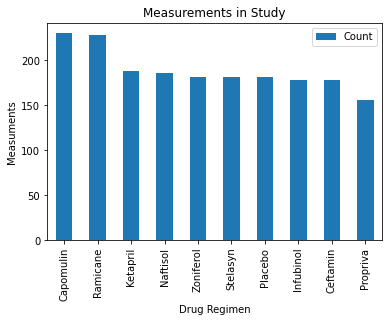

In [11]:
# Create bar plot that shows the total number of measurements taken for each treatment regimen 
#throughout the course of the study

# Plot using DataFrame.plot() to confirm pyplot information. 
bar_df.plot(x="Drug Regimen", y="Count", kind="bar", title="Measurements in Study")
plt.ylabel("Measuments")

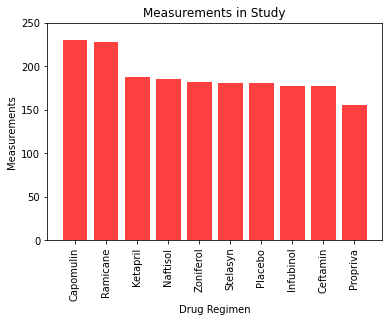

In [12]:
# Create bar plot that shows the total number of measurements taken for each treatment regimen 
#throughout the course of the study

# Plot using pyplot

x_value = bar_df["Drug Regimen"]
y_value = bar_df["Count"]
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.title("Measurements in Study")
plt.ylim(0, max(bar_df["Count"])+ 20)
plt.bar(x_value, y_value, facecolor="red", alpha=0.75)
plt.xticks(rotation=90)
plt.show()

In [13]:
# Find the number of Male and Female mice
sex_count = clean_mouse_df["Sex"].value_counts()
sex_count_df = pd.DataFrame(sex_count)
sex_count_df

,Sex
Male,958
Female,930


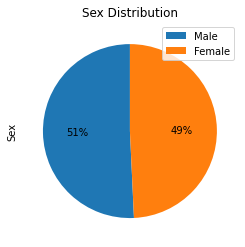

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count_df.plot(kind="pie", y='Sex', use_index=False, title="Sex Distribution", autopct='%1.0f%%', labels=None, startangle=90)



C:\Users\monte\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x1b169a5d550>,
 [Text(-1.0997015355311284, -0.025622895044835673, 'Male'),
  Text(1.099701537930112, 0.02562279208334746, 'Female')],
 [Text(-0.5998372011987972, -0.013976124569910365, '50.7%'),
  Text(0.5998372025073339, 0.013976068409098612, '49.3%')])

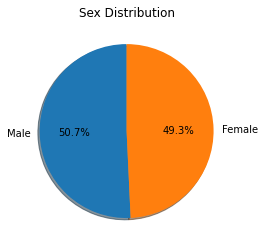

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ['Male', 'Female']
plt.title("Sex Distribution")
plt.pie(sex_count_df, shadow=True, labels=labels, explode=None, autopct='%1.1f%%', startangle=90)


In [84]:
# From the non-duplicate df, leave only the rows with the last Tumor Volume value to create statistical data
tumor_mouse_df = clean_mouse_df.drop_duplicates(subset=['Mouse ID'], keep='last')
tumor_mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [68]:
# Use regimen as index to create a statistical table. 
tumor_regimen_only = tumor_mouse_df[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_regimen_only.head(5)

,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,Ramicane,45,22.050126
19,Capomulin,45,23.343598
29,Capomulin,45,28.484033
39,Capomulin,45,28.430964
49,Ramicane,45,29.128472


In [117]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#df.loc[df['column_name'] == some_value]
tumor_volume = []


for treatment in treatments:
    top_regimens = tumor_regimen_only.loc[tumor_regimen_only['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    tumor_volume.append(top_regimens)

    
    quartiles = top_regimens.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of the tumor volume in {treatment} is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")

    lower_limit = lowerq - (1.5*iqr)
    upper_limit = upperq + (1.5*iqr)
    print(f"Values below {lower_limit} could be outliers.")
    print(f"Values above {upper_limit} could be outliers.")


The lower quartile of the tumor volume in Capomulin is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of the tumor volume in Ramicane is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of the tumor volume in Infubinol is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of the tumor volume in Ceftamin is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.5777

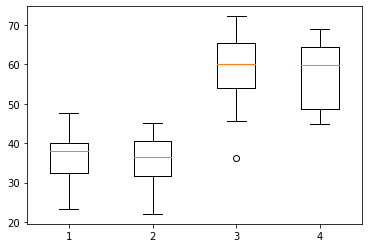

In [76]:

plt.boxplot(tumor_volume)
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [41]:
# Choose a mouse that uses Capomulin then create line chart of tumor vs. time

# Isolate Timepoint and Tumor Volume for "S185"

isolated_df = clean_mouse_df.iloc[10:20, 5:7]
isolated_df

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


In [104]:
# Set timepoint as index to facilitate line plot

time_tumor = isolated_df.set_index('Timepoint')
time_tumor


,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,43.878496
10,37.614948
15,38.177232
20,36.866876
25,33.949940
30,32.959671
35,28.328531
40,25.472143


(0.0, 45.0)

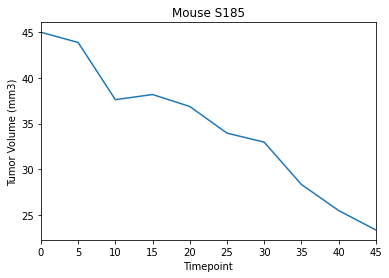

In [112]:
# Plot findings into line plot of tumor volume vs. time point for a mouse treated with Capomulin
# 
plt.plot(time_tumor)
plt.title("Mouse S185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)

In [89]:
capo_values = tumor_mouse_df.loc[tumor_mouse_df['Drug Regimen']=='Capomulin']
mouse_id_group = capo_values.groupby('Mouse ID').mean()
mouse_id_group

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9,22,45,38.982878,2
b742,7,21,45,38.939633,0
f966,16,17,20,30.485985,0
g288,3,19,45,37.074024,1
g316,22,22,45,40.159220,2
i557,1,24,45,47.685963,1
i738,23,20,45,37.311846,2
j119,7,23,45,38.125164,1
j246,21,21,35,38.753265,1


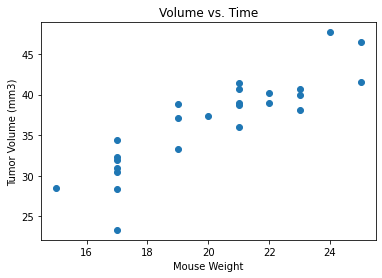

In [95]:
plt.title("Volume vs. Time")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(mouse_id_group["Weight (g)"], mouse_id_group["Tumor Volume (mm3)"])

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
